<a href="https://colab.research.google.com/github/v-zeng/python_projects/blob/main/CISC873_DM_F21_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Wish.com Product Rating Prediction](https://www.kaggle.com/c/cisc873-dm-f21-a1/overview)

Student: Vinson Zeng

Student #: 05550960

**Data Science meme**

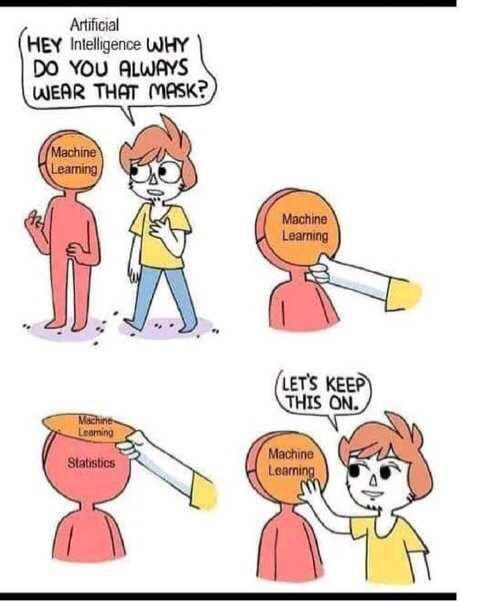

**Problem Formulation**

**Define the problem:** Accurately predict product ratings based on known features to understand the customer base of wish.com.

**What is the input? What is the output?:** Input are features known for a product (independent variables), output is prediction of customer rating (dependent variable).

**What data mining function is required?:** Classification.

**What could be the challenges?:** One challenge is to effectively perform data preparation through data cleaning, feature selection, and data transformation. Another challenge is to evaluate the classification methods based on metrics, such as F1 score, and hyperparameter tuning.

**What is the impact?:** If the data is not effectively prepared the model can overfit or underfit. Overfitting can occur due to the model following the noise, or errors, too closely. Underfitting occurs when the model does performs poorly on training data as it is unable to effectively learn the relationship between the independent and dependent variables. Both overfitting and underfitting will result in poor generalization of the model and thus it will result in poor prediction.

**What is an ideal solution?:** An ideal solution would be an F1 score of 1, which indicates a perfect model.

**Understand the Template**

**What is the experimental protocol used and how was it carried out?**

The goal is to predict product ratings based on the known features for those products. We can estimate how likely people will like a new product without listing it with by building a classification model. The column 'rating' is used as the dependent variable and the remaining features are independent variables.

Product data is imported from wish.com and preprocessed. The data is then split into training and validation sets in a 70/30 partition before encoding categorical features. Validation data is then transformed using mappings built from the training set.

The model is trained using the training data and then predicts the 'rating' for the validation data set on the basis of the trained model.

**What preprocessing steps are used in the template?**

Data filtering, random sampling without replacement, imputation, feature selection, data transformation (encoding).

**What is the model being used?**

Logistic regression model is being used.

**Post-trials Thoughts (see below for trials and their observations):**

Increasing the number of trees in the forest for Trial#9 did not appear to improve the performance of the model. After ten trials, I believe that there could be some improvement in the data preprocessing step or better tuning of hyperparameters. The largest improvements I observed to the F1 score came from scaling the features and using a random forest classifier.

From the beginning I have done the following:

*   Impute missing values using mode
*   Normalize features using StandardScaler
*   Tune logistic regression with max_iter=500
*   Used a correlation matrix to drop features I thought may be unnecessary
*   Tune logistic regression with class_weight='balanced'
*   Tune logistic regression with multi_class='multinomial'
*   Used a decision tree classifier
*   Used a SVM classifier
*   Used a random forest classifier
*   Tune the random forest model with n_estimators=500


*   Feature selection: removed 'currency_buyer' 'product_variation_size_id', 'shipping_option_name', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'theme', 'crawl_month'.






**Answer the questions below (briefly):**

🌈 Why Data Mining is a misnomer? What is another preferred name?

The goal of data mining is pattern extraction and gaining insight or knowledge from data. There is no actual extraction of data itself. Machine learning, data science, and/or data analysis are examples of better names.

🌈 What is the general knowledge discovery process? What is the difference
between a data engineer and data scientist/AI engineer?

The general knowledge discovery process is dat cleaning, dat integration, data selection, data transformation, data mining, pattern evaluation, and knowledge presentation. A data engineer is involved in developing, testing, and maintaining architectures such as databases. A data scientist cleans, organizes, and analyzes data.

🌈 In data mining, what is the difference between prediction and categorization?

Prediction is identifying some unknown class labels, while categorization is identifying the class label for a new observation.

🌈 In a linear model, which regularization method encourages sparsity?

L-1 Regularization (Lasso) encourages model sparsity.

🌈 Why we need GD for optimization, rather than simply use linear algebra to solve a simple linear model?

Gradient descent is computationally faster and cheaper for linear regression.

🌈 In terms of bias and variance, defines what is overfitting and under fitting?

Overfitting: high variance and low bias

Underfitting: low variance and high bias

🌈 Why data science/machine learning is a bad idea in the context of information security?

There are increased risks of data breaches, increased uncertainty, difficulty in evaluating changes in the AI, difficulty in verifying compliance. There are also issues of responsibility, accountability, and liability when using machine learning for information security.


**Template**

In [ ]:
# import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from pprint import pprint

In [ ]:
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified
data = data.fillna(0) # replace NA/NaN values with 0
data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

In [ ]:
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

In [ ]:
tr # training data preview

In [ ]:
dict_cat = {} # create empty dictionary


# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns



def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function
tr # training data preview, categorical features are now encoded

In [ ]:
print('categorical features')
pprint(list(dict_cat.keys())) # formatted printing of categorical features list (the keys in dict_cat)

In [ ]:
print('Lets see what the mapping for column origin_country :')
pprint(dict_cat['origin_country']) # print mapping for column, pprint formats output from smallest to largest integer
print('It is a string to integer mapping')

In [ ]:
# then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)
val

In [ ]:
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables
clf = LogisticRegression().fit(tr_x, tr_y) # train model using training data

In [ ]:
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

In [ ]:
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.740983606557377


In [ ]:
# once you are happy with your local model, let's prepare a submission
# we need to apply the same preprocessing steps on the testing set as you did before you train the model

test_data = pd.read_csv('test_new.csv').sample(frac=1) # sample all rows without replacement
_id = test_data['id']
test_data = test_data.fillna(0) # fill NA/NaN values with 0
test_data = test_data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns
test_data[cat_cols] = test_data[cat_cols].apply(lambda col: col.map(dict_cat[col.name])) # transform test set with mappings from training set

# again, not-seen string value filled with -1
test_data = test_data.fillna(-1)

In [ ]:
pred_test = clf.predict(test_data) # predict for test data based on trained model
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test}) # predictions for 'id' as data frame
pred_df.to_csv('pred_walkthrough.csv', index=False) # save predictions to csv

**Trial#0**

This trial I will impute missing values. Missing values for a numerical feature will be replaced with its mean, while categorical features will use the mode. I think providing more data may improve the performance.

In [ ]:
# Trial#0

#import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from pprint import pprint

In [ ]:
#load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified
data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

In [ ]:
# imputation
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data.isna().sum() # check missing values again

price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
urgency_text                    0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
theme                           0
crawl_month   

In [ ]:
### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables
clf = LogisticRegression().fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.6888888888888889


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Trial#1**

The F1 score from trial#0 appears to be similar to the template score. There is a large difference in magnitude between some attributes. For example, one merchant rating count is over 200,000. This is several magnitudes larger than many other values in various attributes. I will normalize the features using StandardScaler so that they may contribute equally to the model fitting, which reduces bias. I think this may improve the F1 score.

In [ ]:
# Trial#1
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # import for scaling
from sklearn.metrics import f1_score
from pprint import pprint

In [ ]:
### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns


In [ ]:
### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

In [ ]:
### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = LogisticRegression().fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7296511627906975


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Trial#2**

After scaling in trial#1, the F1 score appears to have improved to approximately 0.7 to 0.75. Whereas before the scores would be approximately 0.65 to 0.75.

In this trial I will increase max_iter to an abitrary number of 500 so the solver can converge. I think it may increase the performance of the model since it may find the optimal solution.


In [ ]:
# Trial#2
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # import for scaling
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = LogisticRegression(max_iter=500).fit(tr_x, tr_y) # train model using training data, increase max_iter from default of 100

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7283950617283951


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#3**

Increasing the max_iter in trial#2 finally allowed the solver to converge. I ran it several times and it seems to result in a better F1 score, which appears to be more consistently around 0.72.

This trial I will use a correlation matrix to look for correlated features. I will decide to drop correlated features so that the model accuracy may improve.

In [ ]:
# Trial#3
### import modules and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # import for scaling
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
# make correlation matrix
corrMatrix = data.corr()

#mask redundant squares
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

#adjust dataframe and mask
mask = mask[1:, :-1]
corrDF = corrMatrix.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,20))

#colour for heatmap
cmap = sns.diverging_palette(220,20,as_cmap=True)
#heatmap

sns.heatmap(
    corrDF,
    mask=mask,
    annot=True,
    fmt=".2f",
    linewidths=5,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8},
    square=True
    )

In [ ]:
data = data.drop(['merchant_id',
                  'merchant_profile_picture',
                  'id',
                  'tags',
                  'shipping_option_price',
                  'units_sold',
                  'badges_count',
                  'badge_fast_shipping',
                  'merchant_has_profile_picture'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = LogisticRegression(max_iter=500).fit(tr_x, tr_y) # train model using training data, increase max_iter from default of 100

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7138643067846607


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#4**

Removing 'shipping_option_price', 'units_sold', 'badges_count', 'badge_fast_shipping', and 'merchant_has_profile_picture' did not appear to have an effect on the F1 score. I removed those either due to high correlation (0.8 or greater) or because I thought they were not useful in predicting the rating. However, After the previous trial, I will keep them in case I have incorrectly assumed anything and because the model performance did not seem to change.

For this trial I will set the hyperparameter 'class_weight' to 'balanced' since there appears to be a large number of 4.0 ratings in comparison to the rest. I think it will have some sort of effect on the model performance. I hope it will increase the performance, but I am not entirely sure so I will test it here.

In [ ]:
# Trial#4
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # import for scaling
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = LogisticRegression(max_iter=500, class_weight='balanced').fit(tr_x, tr_y) # train model using training data use class_weight of 'balanced'

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.5184135977337111


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#5**

Trial#4 did not go as I had hoped as the F1 score is much lower (approximately 0.44). I will leave the class_weight as the default and try setting the hyperparameter 'multi_class' to 'multinomial' to see if cross-entropy loss will yield better performance from the model. I predict it will increase the performance.

In [ ]:
# Trial#5
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # import for scaling
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = LogisticRegression(max_iter=500,multi_class='multinomial').fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7438271604938271


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#6**

Trial#5 resulted in F1 scores similar to the default 'ovr' scheme for the multi_class parameter, which are approximately in the vicinity of 0.72.

After several trials with logistic regression I will attempt to use the decision tree model. I have been unable to improve the F1 score beyond the average of approximately 0.72. For a multinomial classification problem the decision tree may be able to capture the boundaries better. I predict the F1 score of the decision tree will be higher than the logistic regression model.


In [ ]:
# Trial#6
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = DecisionTreeClassifier().fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7180327868852459


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#7**

The initial run with the decision tree in the previous trial yielded F1 scores approximately from 0.55 to 0.73, which is worse than the logistic regression model. Next I will try a SVM model since it can find the 'best' margin separating classes in comparison to logistic regression.

In [ ]:
# Trial#7
### import modules and functions
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = svm.SVC()
clf.fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

0.7391304347826085


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Trial#8**

The SVM model yields F1 scores in the 0.7 range. The next model I will try is the random forest model. Since it utilizes ensemble learning, I predict it will have a better F1 score.

In [ ]:
# Trial#8
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id', 'merchant_profile_picture', 'id', 'tags'], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = RandomForestClassifier()
clf.fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0.7909967845659164


**Trial#9**

Trial#8 resulted in the best F1 scores so far, in which it ranges approximately from 0.75 to 0.82. For this 10th trial I will increase the number of trees in the forest to an arbitrary number of 500 in hopes of increasing the model performance. With more trees, I would predict that the predictive accuracy would increase. Additionally, I will drop some columns that I find to be irrelevant.

In [ ]:
# Trial#9
### import modules and functions
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from pprint import pprint

### load and preprocess data
data = pd.read_csv('train_new.csv').sample(frac=1) # randomly sample all rows without replacement
data = data.loc[data['rating'].isin([1, 2, 3, 4, 5])] # filter to return rows only with values specified

# replace missing values with mode of respective columns
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data = data.drop(['merchant_id',
                  'merchant_profile_picture',
                  'id',
                  'tags',
                  'currency_buyer',
                  'product_variation_size_id',
                  'shipping_option_name',
                  'merchant_title',
                  'merchant_name',
                  'merchant_info_subtitle',
                  'theme',
                  'crawl_month'
                  ], axis=1) # drop specified columns

### split data into training and validation sets
msk = np.random.rand(len(data)) < 0.7 # return boolean array with 70% of True values
tr = data[msk] # partition approximately 70% of data into training set
val = data[~msk] # flip True and False with ~msk to partition approximately 30% of data into validation set

### encode categorical features
dict_cat = {} # create empty dictionary

# columns that are of categorical value
cat_cols = tr.columns[tr.dtypes==object].to_list() # create list of categorical columns

# encoding function for categorical features
def cat_digit(col):
    # build the mapping
    encoded = col.astype('category').cat.codes # categorical encoding of column
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded))) # column as key and categorical encoding as values
    return encoded

# for each categorical feature, apply cat_digit where we build the mapping and transform the data
# this is for the training set (where we build the mapping)
tr[cat_cols] = tr[cat_cols].apply(lambda col: cat_digit(col)) # feed each element of cat_cols into cat_digit function

### then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

### train model
tr_y = tr['rating'] # 'rating' as dependent variable
tr_x = tr.drop('rating', axis=1) # drop 'rating from columns, remainder as independent variables

# apply scalar transformation to features before training model
scaler = StandardScaler() # create object of StandardScaler() function
tr_x = scaler.fit_transform(tr_x) # fit scaler on training data predictors and transform

clf = RandomForestClassifier(n_estimators=500) # tune n_estimators parameter
clf.fit(tr_x, tr_y) # train model using training data

### use trained model on validation data
val_y = val['rating'] # set dependent variable for validation data
val_x = val.drop('rating', axis=1) # set independent variables for validation data
val_x = scaler.transform(val_x) # standardize validation using fit from training predictors

pred_val = clf.predict(val_x) # predict 'rating' for validation data on basis of trained model

### compute F1 score
val_score = f1_score(val_y, pred_val, average='micro') # compute F1 score with 'micro' weighting, which uses global true positives, false negatives, and false positives
print(val_score)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0.8066465256797583


**Test Submission**


In [ ]:
# once you are happy with your local model, let's prepare a submission
# we need to apply the same preprocessing steps on the testing set as you did before you train the model

test_data = pd.read_csv('test_new.csv').sample(frac=1) # sample all rows without replacement
_id = test_data['id']
# replace missing values in columns with respective mode
for column in test_data.columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

test_data = test_data.drop(['merchant_id',
                  'merchant_profile_picture',
                  'id',
                  'tags',
                  'currency_buyer',
                  'product_variation_size_id',
                  'shipping_option_name',
                  'merchant_title',
                  'merchant_name',
                  'merchant_info_subtitle',
                  'theme',
                  'crawl_month'
                  ], axis=1) # drop specified columns
test_data[cat_cols] = test_data[cat_cols].apply(lambda col: col.map(dict_cat[col.name])) # transform test set with mappings from training set

# again, not-seen string value filled with -1
test_data = test_data.fillna(-1)

# standardize test data using fit from training data
test_data = scaler.transform(test_data)

In [ ]:
pred_test = clf.predict(test_data) # predict for test data based on trained model
pred_df = pd.DataFrame(data={'id': np.asarray(_id), 'rating': pred_test}) # predictions for 'id' as data frame
pred_df.to_csv('pred_walkthrough.csv', index=False) # save predictions to csv